In [1]:
import numpy as np
#from lhereader import LHEReader

from LHCO_reader import LHCO_reader

import math
import os

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

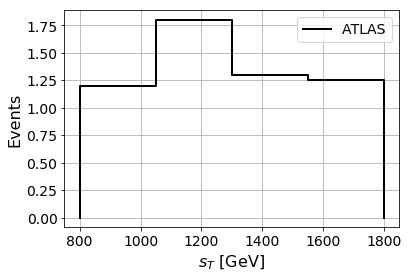

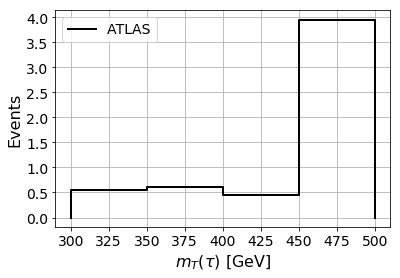

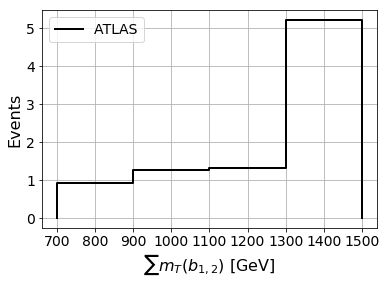

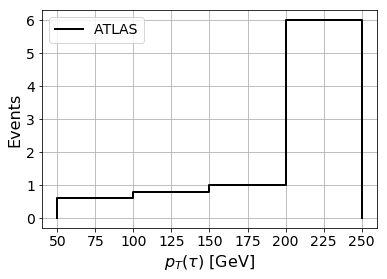

In [2]:
import matplotlib.pyplot as plt

ATLAS_sT = [0,1.2,1.2,1.8,1.8,1.3,1.3,1.25,1.25,0]
ATLAS_mTtau = [0,0.55,0.55,0.6,0.6,0.45,0.45,3.95,3.95,0]
ATLAS_mTbb = [0,0.9,0.9,1.25,1.25,1.3,1.3,5.2,5.2,0]
ATLAS_pT = [0,0.6,0.6,0.8,0.8,1,1,6,6,0]

plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  


plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show() 


plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show() 

## SIGNAL LQ down

#### LQ-down-800GeV

In [3]:
Folder = 'LQdown-14TeV/LQdown-800GeV/'

LQdown_800GeV_cross = 0.0206803
LQdown_800GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_800GeV_evs = len(ev)
print('# events that pass the cuts: ', LQdown_800GeV_evs)

/home/andres/anaconda3/envs/py2/lib/python2.7/site-packages/LHCO_reader/LHCO_reader.py:359: UserWarning: Couldn't read total number of events from LHCO
  warnings.warn("Couldn't read total number of events from LHCO")


('# events that pass the cuts: ', 15922)


In [4]:
cross = LQdown_800GeV_cross*1000
aceptancia = LQdown_800GeV_evs/(50000.*LQdown_800GeV_runs)
luminosidad = 3000

LQdown_800GeV_fidcross = cross * aceptancia
LQdown_800GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQdown_800GeV_fidcross)
print('S_expected: ', LQdown_800GeV_Sexpected)

('fiducial cross section: ', 1.3170869464)
('S_expected: ', 3951.2608391999997)


In [5]:
Folder = 'LQdown-14TeV/LQdown-800GeV/'

LQdown_800GeV_cross = 0.0206803
LQdown_800GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_800GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQdown_800GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 8497)


In [6]:
cross = LQdown_800GeV_cross*1000
aceptancia = LQdown_800GeV_evs_ATLAS/(50000.*LQdown_800GeV_runs)
luminosidad = 3000

LQdown_800GeV_fidcross_ATLAS = cross * aceptancia
LQdown_800GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQdown_800GeV_fidcross_ATLAS)
print('S_expected: ', LQdown_800GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.7028820363999999)
('S_expected: ', 2108.6461092)


#### LQ-down-1000GeV

In [7]:
Folder = 'LQdown-14TeV/LQdown-1000GeV/'

LQdown_1000GeV_cross = 0.00498473
LQdown_1000GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1000GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1000GeV_evs = len(ev)
print('# events that pass the cuts: ', LQdown_1000GeV_evs)

('# events that pass the cuts: ', 19115)


In [8]:
cross = LQdown_1000GeV_cross*1000
aceptancia = LQdown_1000GeV_evs/(50000.*LQdown_1000GeV_runs)
luminosidad = 3000

LQdown_1000GeV_fidcross = cross * aceptancia
LQdown_1000GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQdown_1000GeV_fidcross)
print('S_expected: ', LQdown_1000GeV_Sexpected)

('fiducial cross section: ', 0.3811324558)
('S_expected: ', 1143.3973674)


In [9]:
Folder = 'LQdown-14TeV/LQdown-1000GeV/'

LQdown_1000GeV_cross = 0.00498473
LQdown_1000GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1000GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1000GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQdown_1000GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 12390)


In [10]:
cross = LQdown_1000GeV_cross*1000
aceptancia = LQdown_1000GeV_evs_ATLAS/(50000.*LQdown_1000GeV_runs)
luminosidad = 3000

LQdown_1000GeV_fidcross_ATLAS = cross * aceptancia
LQdown_1000GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQdown_1000GeV_fidcross_ATLAS)
print('S_expected: ', LQdown_1000GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.2470432188)
('S_expected: ', 741.1296563999999)


#### LQ-down-1200GeV

In [11]:
Folder = 'LQdown-14TeV/LQdown-1200GeV/'

LQdown_1200GeV_cross = 0.001368708
LQdown_1200GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1200GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1200GeV_evs = len(ev)
print('# events that pass the cuts: ', LQdown_1200GeV_evs)

('# events that pass the cuts: ', 21015)


In [12]:
cross = LQdown_1200GeV_cross*1000
aceptancia = LQdown_1200GeV_evs/(50000.*LQdown_1200GeV_runs)
luminosidad = 3000

LQdown_1200GeV_fidcross = cross * aceptancia
LQdown_1200GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQdown_1200GeV_fidcross)
print('S_expected: ', LQdown_1200GeV_Sexpected)

('fiducial cross section: ', 0.11505359448)
('S_expected: ', 345.16078344)


In [13]:
Folder = 'LQdown-14TeV/LQdown-1200GeV/'

LQdown_1200GeV_cross = 0.001368708
LQdown_1200GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1200GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1200GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQdown_1200GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 14941)


In [14]:
cross = LQdown_1200GeV_cross*1000
aceptancia = LQdown_1200GeV_evs_ATLAS/(50000.*LQdown_1200GeV_runs)
luminosidad = 3000

LQdown_1200GeV_fidcross_ATLAS = cross * aceptancia
LQdown_1200GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQdown_1200GeV_fidcross_ATLAS)
print('S_expected: ', LQdown_1200GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.081799464912)
('S_expected: ', 245.39839473600003)


In [15]:
print('global k-factor for all masses (taken from 1200GeV at 13 TeV):', 1.8247261601649074)

('global k-factor for all masses (taken from 1200GeV at 13 TeV):', 1.8247261601649074)


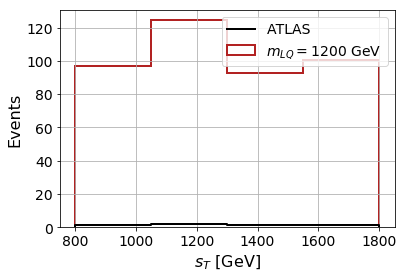

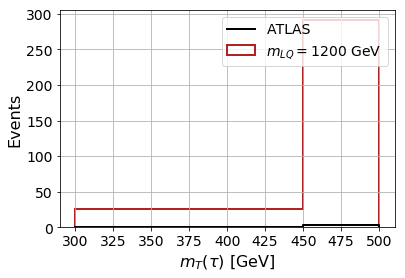

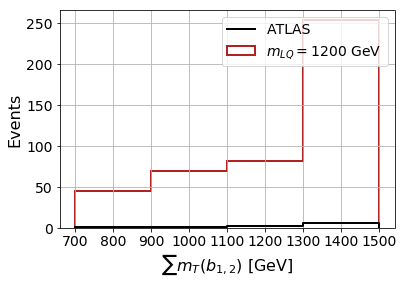

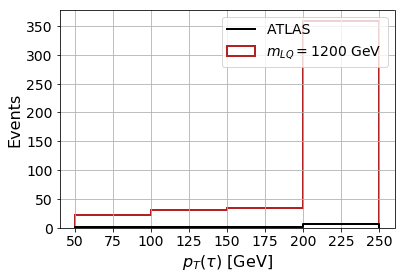

In [16]:
k_factor_1200 = 1.8247261601649074
factor_weight_1200 = (1./k_factor_1200)*LQdown_1200GeV_evs_ATLAS/LQdown_1200GeV_Sexpected_ATLAS


BGttstau_store_sT_cap_1200 = []
for i in range(len(BGttstau_store_sT)):
    if BGttstau_store_sT[i] > 1800:
        BGttstau_store_sT_cap_1200.append( 1800 )
    else:
        BGttstau_store_sT_cap_1200.append( BGttstau_store_sT[i] )
        
    
weights_sT_1200 = np.ones_like(BGttstau_store_sT_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_sT_cap_1200, weights=weights_sT_1200, bins=[800, 1050, 1300, 1550, 1800], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTtau_cap_1200 = []
for i in range(len(BGttstau_store_mTtau)):
    if BGttstau_store_mTtau[i] > 500:
        BGttstau_store_mTtau_cap_1200.append( 500 )
    else:
        BGttstau_store_mTtau_cap_1200.append( BGttstau_store_mTtau[i] )
        
    
weights_mTtau_1200 = np.ones_like(BGttstau_store_mTtau_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_mTtau_cap_1200, weights=weights_mTtau_1200, bins=[300, 350, 400, 450, 500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTb1b2_cap_1200 = []
for i in range(len(BGttstau_store_mTb1b2)):
    if BGttstau_store_mTb1b2[i] > 1500:
        BGttstau_store_mTb1b2_cap_1200.append( 1500 )
    else:
        BGttstau_store_mTb1b2_cap_1200.append( BGttstau_store_mTb1b2[i] )
        
    
weights_mTb1b2_1200 = np.ones_like(BGttstau_store_mTb1b2_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_mTb1b2_cap_1200, weights=weights_mTb1b2_1200, bins=[700, 900, 1100, 1300, 1500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_pTtau_cap_1200 = []
for i in range(len(BGttstau_store_pTtau)):
    if BGttstau_store_pTtau[i] > 250:
        BGttstau_store_pTtau_cap_1200.append( 250 )
    else:
        BGttstau_store_pTtau_cap_1200.append( BGttstau_store_pTtau[i] )
        
    
weights_pTtau_1200 = np.ones_like(BGttstau_store_pTtau_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_pTtau_cap_1200, weights=weights_pTtau_1200, bins=[50, 100, 150, 200, 250], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  

#### LQ-down-1400GeV

In [17]:
Folder = 'LQdown-14TeV/LQdown-1400GeV/'

LQdown_1400GeV_cross =  0.0004114859
LQdown_1400GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1400GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1400GeV_evs = len(ev)
print('# events that pass the cuts: ', LQdown_1400GeV_evs)

('# events that pass the cuts: ', 22266)


In [18]:
cross = LQdown_1400GeV_cross*1000
aceptancia = LQdown_1400GeV_evs/(50000.*LQdown_1400GeV_runs)
luminosidad = 3000

LQdown_1400GeV_fidcross = cross * aceptancia
LQdown_1400GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQdown_1400GeV_fidcross)
print('S_expected: ', LQdown_1400GeV_Sexpected)

('fiducial cross section: ', 0.036648580197600006)
('S_expected: ', 109.94574059280002)


In [19]:
Folder = 'LQdown-14TeV/LQdown-1400GeV/'

LQdown_1400GeV_cross = 0.0004114859
LQdown_1400GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1400GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1400GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQdown_1400GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 16693)


In [20]:
cross = LQdown_1400GeV_cross*1000
aceptancia = LQdown_1400GeV_evs_ATLAS/(50000.*LQdown_1400GeV_runs)
luminosidad = 3000

LQdown_1400GeV_fidcross_ATLAS = cross * aceptancia
LQdown_1400GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQdown_1400GeV_fidcross_ATLAS)
print('S_expected: ', LQdown_1400GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.027475736514800002)
('S_expected: ', 82.4272095444)


#### LQ-down-1600GeV

In [21]:
Folder = 'LQdown-14TeV/LQdown-1600GeV/'

LQdown_1600GeV_cross = 0.0001318709
LQdown_1600GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1600GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1600GeV_evs = len(ev)
print('# events that pass the cuts: ', LQdown_1600GeV_evs)

('# events that pass the cuts: ', 23227)


In [22]:
cross = LQdown_1600GeV_cross*1000
aceptancia = LQdown_1600GeV_evs/(50000.*LQdown_1600GeV_runs)
luminosidad = 3000

LQdown_1600GeV_fidcross = cross * aceptancia
LQdown_1600GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQdown_1600GeV_fidcross)
print('S_expected: ', LQdown_1600GeV_Sexpected)

('fiducial cross section: ', 0.012251861577200002)
('S_expected: ', 36.75558473160001)


In [23]:
Folder = 'LQdown-14TeV/LQdown-1600GeV/'

LQdown_1600GeV_cross = 0.0001318709
LQdown_1600GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1600GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1600GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQdown_1600GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 17735)


In [24]:
cross = LQdown_1600GeV_cross*1000
aceptancia = LQdown_1600GeV_evs_ATLAS/(50000.*LQdown_1600GeV_runs)
luminosidad = 3000

LQdown_1600GeV_fidcross_ATLAS = cross * aceptancia
LQdown_1600GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQdown_1600GeV_fidcross_ATLAS)
print('S_expected: ', LQdown_1600GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.009354921646000002)
('S_expected: ', 28.064764938000007)


#### LQ-down-1800GeV

In [25]:
Folder = 'LQdown-14TeV/LQdown-1800GeV/'

LQdown_1800GeV_cross = 4.42467e-05
LQdown_1800GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1800GeV_evs = len(ev)
print('# events that pass the cuts: ', LQdown_1800GeV_evs)

('# events that pass the cuts: ', 23231)


In [26]:
cross = LQdown_1800GeV_cross*1000
aceptancia = LQdown_1800GeV_evs/(50000.*LQdown_1800GeV_runs)
luminosidad = 3000

LQdown_1800GeV_fidcross = cross * aceptancia
LQdown_1800GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQdown_1800GeV_fidcross)
print('S_expected: ', LQdown_1800GeV_Sexpected)

('fiducial cross section: ', 0.0041115803508)
('S_expected: ', 12.3347410524)


In [27]:
Folder = 'LQdown-14TeV/LQdown-1800GeV/'

LQdown_1800GeV_cross = 4.42467e-05
LQdown_1800GeV_runs = 5

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQdown_1800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQdown_1800GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQdown_1800GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 18134)


In [28]:
cross = LQdown_1800GeV_cross*1000
aceptancia = LQdown_1800GeV_evs_ATLAS/(50000.*LQdown_1800GeV_runs)
luminosidad = 3000

LQdown_1800GeV_fidcross_ATLAS = cross * aceptancia
LQdown_1800GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQdown_1800GeV_fidcross_ATLAS)
print('S_expected: ', LQdown_1800GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0032094786312000002)
('S_expected: ', 9.6284358936)


### Expected number of events after cuts

In [29]:
S_exp_loose_14TeV = [LQdown_800GeV_Sexpected, LQdown_1000GeV_Sexpected, LQdown_1200GeV_Sexpected, LQdown_1400GeV_Sexpected, LQdown_1600GeV_Sexpected, LQdown_1800GeV_Sexpected]

S_exp_ATLAS_14TeV = [LQdown_800GeV_Sexpected_ATLAS, LQdown_1000GeV_Sexpected_ATLAS, LQdown_1200GeV_Sexpected_ATLAS, LQdown_1400GeV_Sexpected_ATLAS, LQdown_1600GeV_Sexpected_ATLAS, LQdown_1800GeV_Sexpected_ATLAS]

print(S_exp_loose_14TeV)
print(S_exp_ATLAS_14TeV)

[3951.2608391999997, 1143.3973674, 345.16078344, 109.94574059280002, 36.75558473160001, 12.3347410524]
[2108.6461092, 741.1296563999999, 245.39839473600003, 82.4272095444, 28.064764938000007, 9.6284358936]


In [ ]:
S_exp_loose_14TeV = [3951.2608391999997, 1143.3973674, 345.16078344, 109.94574059280002, 36.75558473160001, 12.3347410524]
S_exp_ATLAS_14TeV = [2108.6461092, 741.1296563999999, 245.39839473600003, 82.4272095444, 28.064764938000007, 9.6284358936]

In [30]:
mass = [800,1000,1200,1400,1600,1800]

S_exp_loose = [98.48322359999999,24.560879664,6.3706222016,1.749166481279999,0.4999537632960000,0.1472655627]
S_exp_ATLAS = [57.06021168,16.51747008,4.603430467199999,1.3032693376,0.38309955465600004,0.11508343760000002]

S_k_factor = [1.8247261601649074] # LQ down

In [32]:
rate_loose = [i/j for i, j in zip(S_exp_loose_14TeV, S_exp_loose)]
rate_ATLAS = [i/j for i, j in zip(S_exp_ATLAS_14TeV, S_exp_ATLAS)]

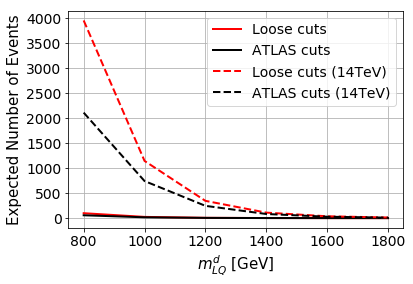

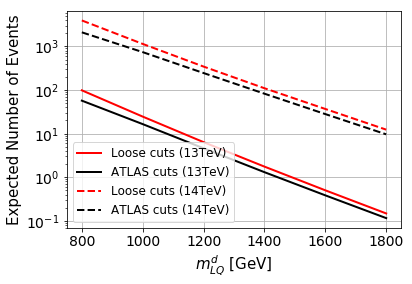

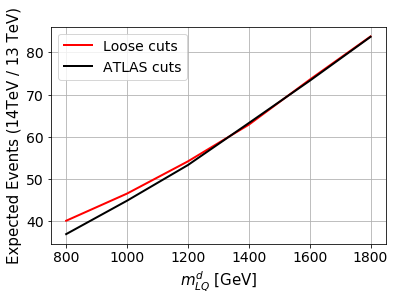

In [36]:
plt.plot(mass, S_exp_loose, color='red', linewidth=2, label=r'Loose cuts')
plt.plot(mass, S_exp_ATLAS, color='black', linewidth=2, label=r'ATLAS cuts')
plt.plot(mass, S_exp_loose_14TeV, color='red', linestyle='--', linewidth=2, label=r'Loose cuts (14TeV)')
plt.plot(mass, S_exp_ATLAS_14TeV, color='black', linestyle='--', linewidth=2, label=r'ATLAS cuts (14TeV)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yscale('log')
plt.xlabel(r"$m_{LQ}^d$ [GeV]",fontsize=15)
plt.ylabel('Expected Number of Events', fontsize = 15)
plt.grid()
plt.legend(fontsize=14)
plt.show() 

plt.plot(mass, S_exp_loose, color='red', linewidth=2, label=r'Loose cuts (13TeV)')
plt.plot(mass, S_exp_ATLAS, color='black', linewidth=2, label=r'ATLAS cuts (13TeV)')
plt.plot(mass, S_exp_loose_14TeV, color='red', linestyle='--', linewidth=2, label=r'Loose cuts (14TeV)')
plt.plot(mass, S_exp_ATLAS_14TeV, color='black', linestyle='--', linewidth=2, label=r'ATLAS cuts (14TeV)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xlabel(r"$m_{LQ}^d$ [GeV]",fontsize=15)
plt.ylabel('Expected Number of Events', fontsize = 15)
plt.grid()
plt.legend(fontsize=12)
plt.savefig('LQdown_expected_events_14TeV.pdf', bbox_inches='tight')
plt.show() 

plt.plot(mass, rate_loose, color='red', linewidth=2, label=r'Loose cuts')
plt.plot(mass, rate_ATLAS, color='black', linewidth=2, label=r'ATLAS cuts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yscale('log')
plt.xlabel(r"$m_{LQ}^d$ [GeV]",fontsize=15)
plt.ylabel('Expected Events (14TeV / 13 TeV)', fontsize = 15)
plt.grid()
plt.legend(fontsize=14)
#plt.savefig('LQdown_expected_events.pdf', bbox_inches='tight')
plt.show() 